In [17]:
from utils import read_event_file, calculate_reward_thresholds, variance_last_steps
import matplotlib.pyplot as plt
import numpy as np

In [18]:
file_names = ["hit_bonus_dist_armmovementpaper_effort","hit_bonus_dist_ctc_effort_w1","hit_bonus_dist_dc_effort_w1","hit_bonus_dist_jac_effort_w1", "hit_bonus_8_zero_effort", "hit_bonus_dist_zero_effort", "no_bonus_dist_zero_effort"]
reward_names = ["Bonus + Distance + Effort Model", "Bonus + Distance + Effort Model", "Bonus + Distance + Effort Model","Bonus + Distance + Effort Model","Bonus", "Bonus + Distance", "Distance"]
cmap = plt.get_cmap('plasma') 
values = np.linspace(0, len(file_names[3:]), len(file_names[3:])) 
colors = {key: cmap(v / 5) for key, v in zip(file_names[3:], values)}
colors["hit_bonus_dist_armmovementpaper_effort"] = colors["hit_bonus_dist_jac_effort_w1"]
colors["hit_bonus_dist_ctc_effort_w1"] = colors["hit_bonus_dist_jac_effort_w1"]
colors["hit_bonus_dist_dc_effort_w1"] = colors["hit_bonus_dist_jac_effort_w1"]
thresholds=[0.2, 0.5, 0.9]
effort_models = ["EJK", "CTC", "DC", "JAC", "No", "No", "No"]
plt.rcParams.update({'font.size': 16})
figsize = (7,5)

In [19]:
rewards = {}
steps = {}
threshold_steps = {}
auc_normalized = {}
variance = {}
i = 0
for f in file_names:
    event_folder = f"../../simulators/mobl_arms_index_pointing_{f}"
    steps[f], rewards[f] = read_event_file(event_folder)
    print('---------------------------------------------------------------------')
    print(f"{f}:")
    threshold_steps[f], auc_normalized[f] = calculate_reward_thresholds(steps[f], rewards[f], thresholds)
    variance[f] = variance_last_steps(steps[f], rewards[f]) 
    i += 1

../../simulators/mobl_arms_index_pointing_hit_bonus_dist_armmovementpaper_effort\PPO_1\events.out.tfevents.1741859123.paula12.sc.uni-leipzig.de.1326112.0
---------------------------------------------------------------------
hit_bonus_dist_armmovementpaper_effort:
Threshold 20% after 1120000 steps
Threshold 50% after 3840000 steps
Threshold 90% after 17600000 steps
Area under the curve: 675.8729803301399
126 1.0 0.9796291926969699
Variance from 30M steps on: 1.883050781357572e-05
../../simulators/mobl_arms_index_pointing_hit_bonus_dist_ctc_effort_w1\PPO_1\events.out.tfevents.1741890744.paula01.sc.uni-leipzig.de.2198710.0
---------------------------------------------------------------------
hit_bonus_dist_ctc_effort_w1:
Threshold 20% after 1440000 steps
Threshold 50% after 5000000 steps
Threshold 90% after 22880000 steps
Area under the curve: 639.2872305641642
126 1.0 0.9199676656162619
Variance from 30M steps on: 0.00029022947407244653
../../simulators/mobl_arms_index_pointing_hit_bonus

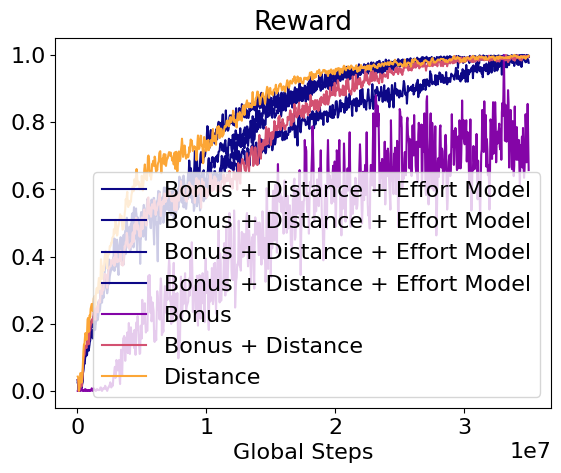

In [20]:
i = 0
for f in file_names:
    plt.plot(steps[f], (np.array(rewards[f]) - min(rewards[f])) / (max(rewards[f]) - min(rewards[f])), color=colors[f], label = reward_names[i])
    i+= 1
plt.title("Reward")
plt.legend()
plt.xlabel("Global Steps")
plt.savefig("reward_plots/pointing_reward_curve.png")

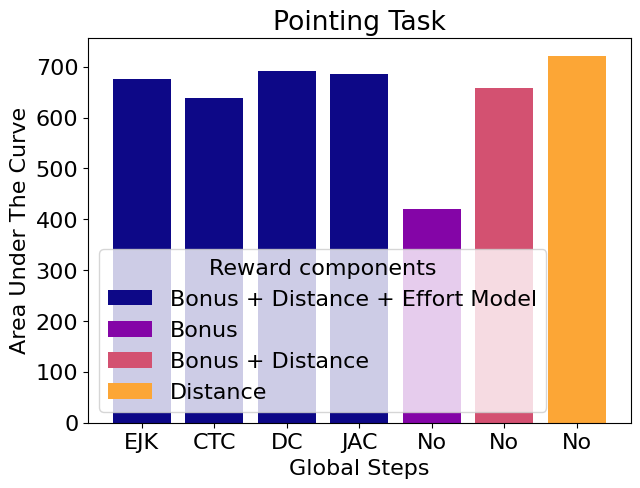

In [21]:
fig, ax = plt.subplots(figsize=figsize)
i = 0
for f in file_names:
    if i > 0 and i < 4:
        ax.bar(i, auc_normalized[f], color=colors[f])
    else:
        ax.bar(i, auc_normalized[f], color=colors[f], label = reward_names[i])
    i+= 1
plt.title("Pointing Task")
plt.legend(title="Reward components",loc="lower left")
plt.xticks(np.arange(0, 7, 1),["EJK", "CTC", "DC", "JAC", "No", "No", "No"])
plt.xlabel("Global Steps")
plt.ylabel("Area Under The Curve")
plt.savefig("reward_plots/pointing_auc.png")

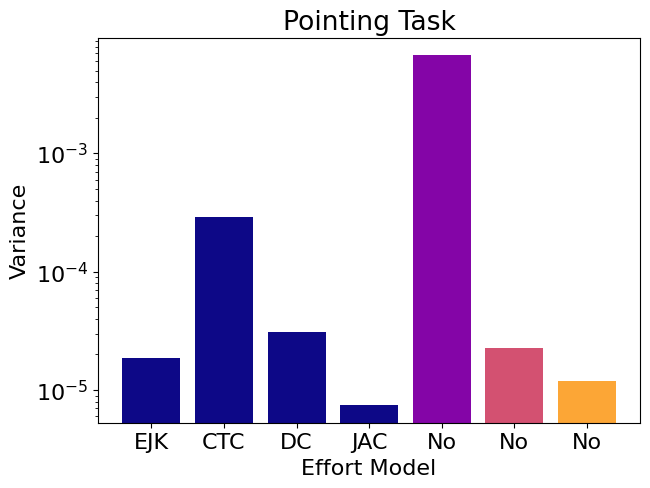

In [22]:
fig, ax = plt.subplots(figsize=figsize)
i = 0
for f in file_names:
    ax.bar(i, variance[f], color=colors[f], label = reward_names[i])
    i+= 1
plt.title("Pointing Task")
plt.xticks(np.arange(0, 7, 1),effort_models)
plt.xlabel("Effort Model")
plt.ylabel("Variance")
plt.yscale('log')
plt.savefig("reward_plots/pointing_variance.png")

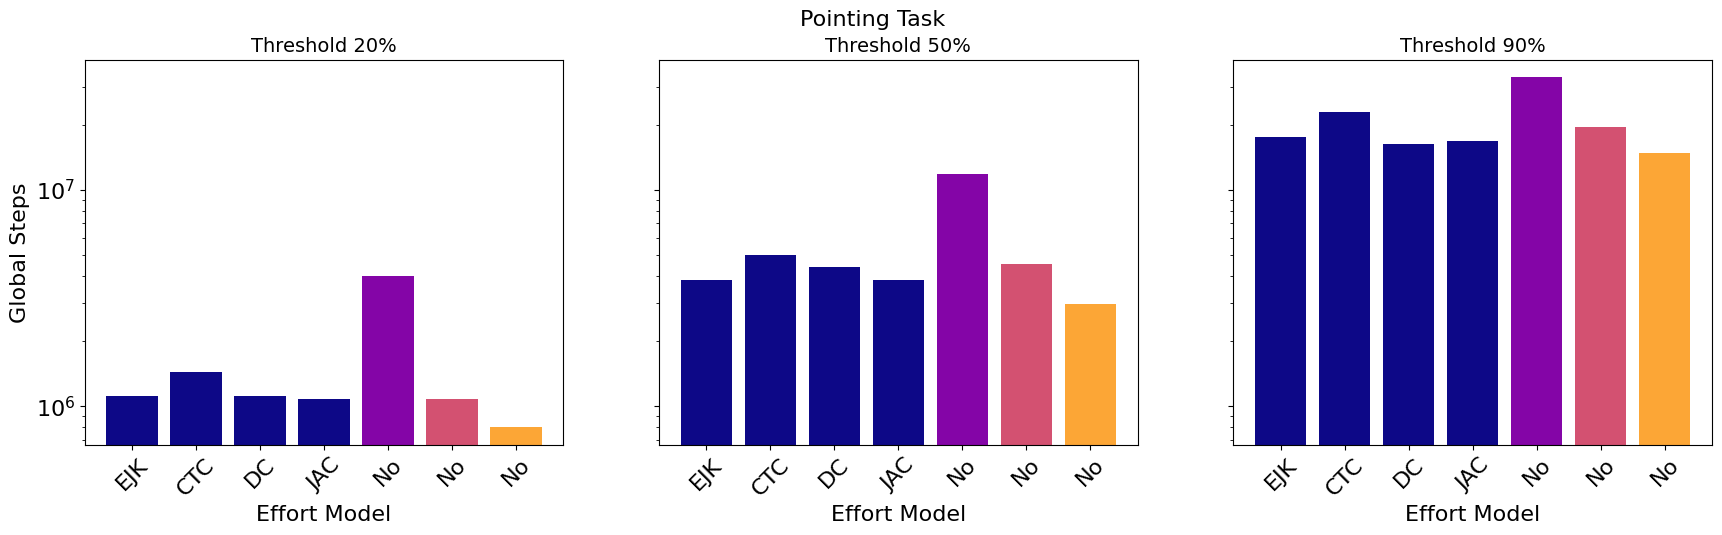

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(21, 5), sharey=True)

for idx, t in enumerate(thresholds):
    ax = axes[idx]
    for i, f in enumerate(file_names):
        ax.bar(i, threshold_steps[f][t], color=colors[f], label=reward_names[i])
    
    ax.set_title(f"Threshold {int(t*100)}%", fontsize=14)
    ax.set_xticks(np.arange(len(file_names)))
    ax.set_xticklabels(effort_models, rotation=45)
    ax.set_xlabel("Effort Model")
    ax.set_yscale('log')
    if idx == 0:
        ax.set_ylabel("Global Steps")

fig.suptitle("Pointing Task", fontsize=16)
plt.savefig("reward_plots/pointing_thresholds.png")
plt.show()